# MNIST Dataset classification using CNN network

The same data set will be used and it will be trained using Convolutional Neural Network.And hence, by this task we will compare the model accuracy of a simple CNN with that of a Deep Neural Network

In [1]:
import math
import numpy as np
import pandas as pd
import tensorflow
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt

tf.disable_v2_behavior()

%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
Raw_train = pd.read_csv ('C:\\Users\\rohan\\coursera-dl\\mnist_train.csv')
Raw_test = pd.read_csv ('C:\\Users\\rohan\\coursera-dl\\mnist_test.csv')


#Separating Images and label
Y_train_orig = Raw_train['label']
X_train_orig = Raw_train.drop('label', axis = 1)
Y_test_orig = Raw_test['label']
X_test_orig = Raw_test.drop('label', axis = 1)

#Deleting extra variables after separation
del Raw_train, Raw_test

In [3]:
print("Number of training examples:",len(X_train_orig))
print("Number of test examples:",len(X_test_orig))

X_train = X_train_orig.to_numpy().reshape(-1,28,28,1)
X_test = X_test_orig.to_numpy().reshape(-1,28,28,1)

Y_train = Y_train_orig.to_numpy()
Y_test = Y_test_orig.to_numpy()

print(X_train.shape)
print(X_test.shape)

Number of training examples: 60000
Number of test examples: 10000
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
#Normalising
X_train = X_train/255
X_test = X_test/255

In [29]:
model = tf.keras.Sequential([
                                tf.keras.layers.Conv2D(8 , 28,strides=(1,1), padding='same',input_shape=(28,28,1) ),
                                tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
                                tf.keras.layers.Conv2D(16 ,(5,5),strides = (1,1),padding='valid'),
                                tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
                            ])

In [30]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 8)         6280      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 16)        3216      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 16)          0         
Total params: 9,496
Trainable params: 9,496
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120, activation = 'relu'))
model.add(tf.keras.layers.Dense(84, activation = 'relu' ))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [32]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 8)         6280      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 16)        3216      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)              

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, batch_size = 1000)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 168s 3ms/sample - loss: 0.1332 - acc: 0.9600
Epoch 2/10
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.0889 - acc: 0.9729
Epoch 3/10
60000/60000 [==============================] - 172s 3ms/sample - loss: 0.0678 - acc: 0.9791
Epoch 4/10
60000/60000 [==============================] - 173s 3ms/sample - loss: 0.0538 - acc: 0.9835
Epoch 5/10
60000/60000 [==============================] - 194s 3ms/sample - loss: 0.0461 - acc: 0.9859
Epoch 6/10
60000/60000 [==============================] - 202s 3ms/sample - loss: 0.0385 - acc: 0.9881
Epoch 7/10
60000/60000 [==============================] - 195s 3ms/sample - loss: 0.0305 - acc: 0.9902
Epoch 8/10
60000/60000 [==============================] - 176s 3ms/sample - loss: 0.0267 - acc: 0.9915
Epoch 9/10
60000/60000 [==============================] - 175s 3ms/sample - loss: 0.0227 - acc: 0.9929
Epoch 10/10
60000/60000 [=========================

In [36]:
test_loss, test_acc = model.evaluate(X_test,Y_test)

print('\nTest accuracy:', test_acc)

C:\Users\rohan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '



Test accuracy: 0.9827


The number is 5


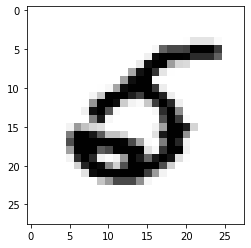

In [50]:
index = np.random.randint(0,10000)
plt.imshow(X_test[index,:], cmap = 'Greys')
a =  np.squeeze(model.predict(X_test)[index,:])

a = (np.argmax(a))
print("The number is",a)